In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
from IPython.display import Image
from graphviz import Graph
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/yari/2023/ML/WineQT.csv', header =0)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
n_datapoints, n_attributs = data.shape
print('Det finns', n_datapoints, 'datapunkter och', n_attributs-1, 'attribut')

Det finns 1143 datapunkter och 12 attribut


In [6]:
n_classes = data['quality'].nunique()
print('Det finns', n_classes, 'olika klasser ')

Det finns 6 olika klasser 


## För att se hur distributionen ser ut för de olika klasser, använder vi oss av Matplotlib biblioteket för att rita ut histogrammen för varje attribut.

Text(0, 0.5, 'Antal')

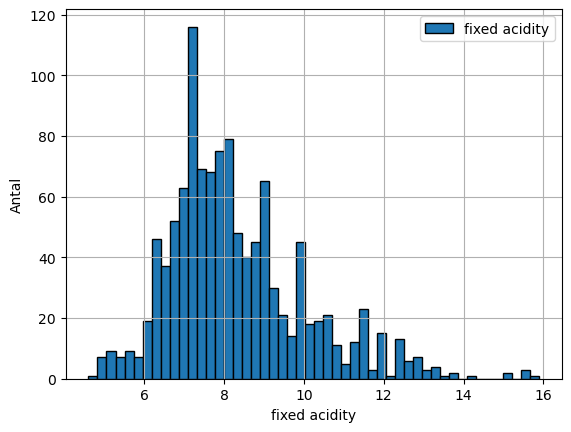

In [7]:
data['fixed acidity'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('fixed acidity')
plt.ylabel('Antal')

### I histogrammet ovan ser man en hög koncentration av vin med en fixerad surhetsgrad runt 6.5 - 8.5

Text(0, 0.5, 'Antal')

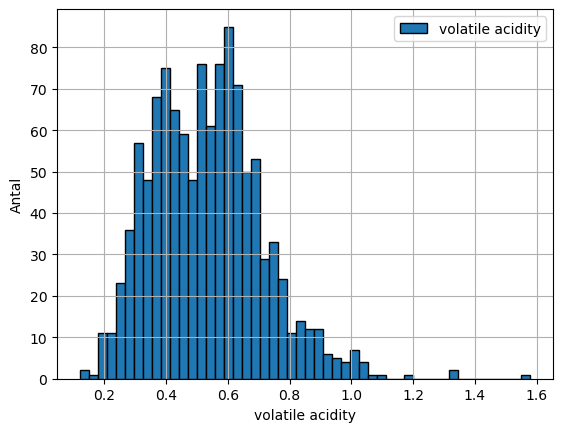

In [8]:
data['volatile acidity'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('volatile acidity')
plt.ylabel('Antal')

### här visar histogrammet högre fördelning på lägre värden av "volatile acidity", och den minskar gradvis och blir mer utspridd när "volatile acidity" ökar. Det finns några avvikelser från det normala, med några observationer som har höga värden av "volatile acidity".

Text(0, 0.5, 'Antal')

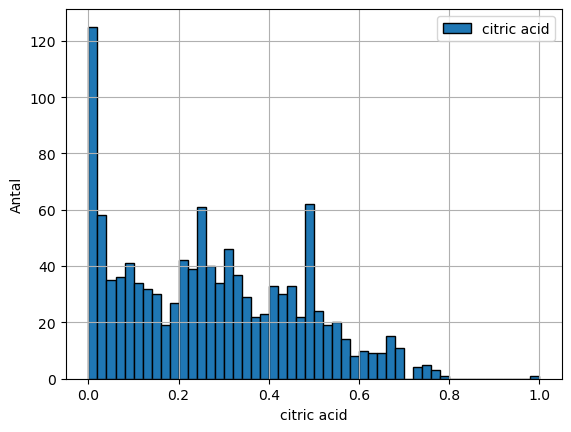

In [9]:
data['citric acid'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('citric acid')
plt.ylabel('Antal')

### Histogrammet för "citric acid" visar de flesta vinen har en citronsyrehalt mellan 0,0 och 0,5.

Text(0, 0.5, 'Antal')

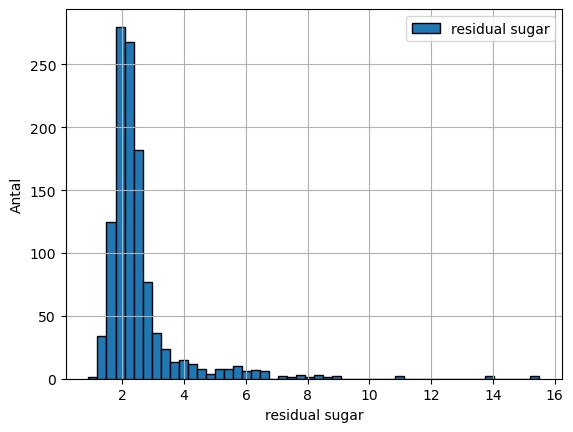

In [10]:
data['residual sugar'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('residual sugar')
plt.ylabel('Antal')

### histogrammet visar dem flesta vin har en lägre residual suger, det visar en hög koncentration av datapunkter med låga residual sugar-värden och en låg koncentration av datapunkter med höga residual sugar-värden.

Text(0, 0.5, 'Antal')

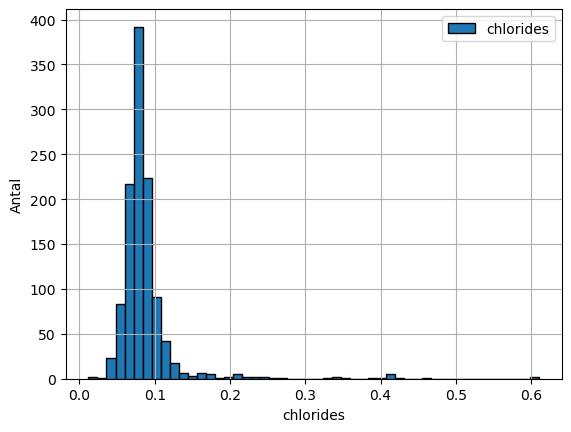

In [11]:
data['chlorides'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('chlorides')
plt.ylabel('Antal')

### Histogrammet visar att de flesta vinproverna har en relativt låg kloridkoncentration, medan några få vinprover har en högre koncentration. 

Text(0, 0.5, 'Antal')

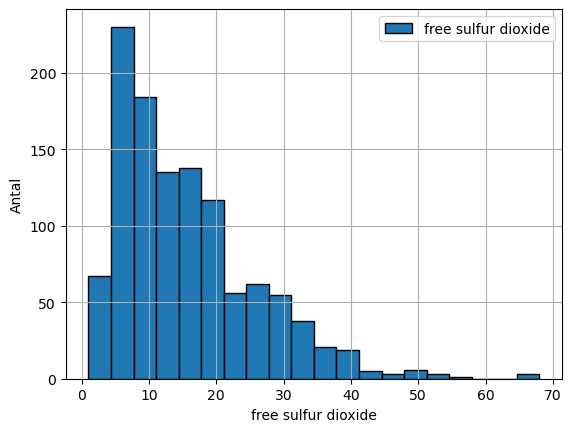

In [12]:
data['free sulfur dioxide'].hist(legend = True, bins = 20, ec = 'black')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Antal')

### Det verkar som att fördelningen är någorlunda normal med en topp runt 5-15 enheter och ett fallande antal enheter på både höger och vänster sida av toppen. 

Text(0, 0.5, 'Antal')

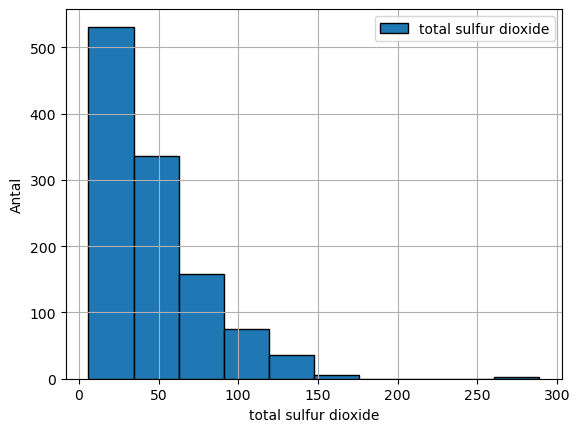

In [13]:
data['total sulfur dioxide'].hist(legend = True, bins = 10, ec = 'black')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Antal')

### Fördelningen är högerlutande och skev med ett högt antal datapunkter runt ungifär 5-50 och en långsträckt hög höger svans som sträcker sig upp till närmare 300.

Text(0, 0.5, 'Antal')

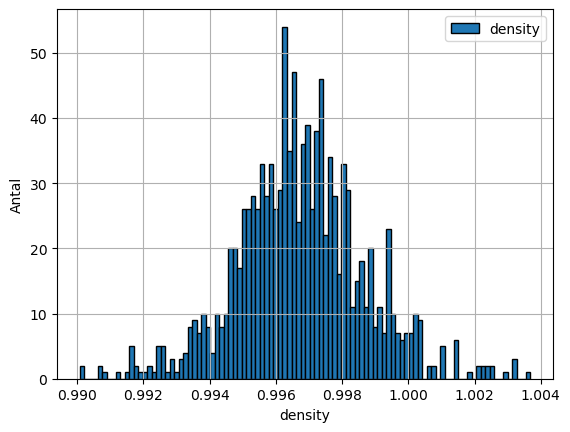

In [14]:
data['density'].hist(legend = True, bins = 100, ec = 'black')
plt.xlabel('density')
plt.ylabel('Antal')

### histogrammet visar att de flesta viner har densitet mellan 0,996 och 0,998

Text(0, 0.5, 'Antal')

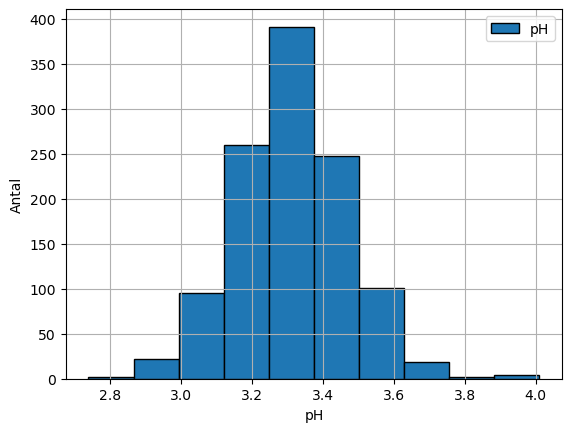

In [15]:
data['pH'].hist(legend = True, bins = 10, ec = 'black')
plt.xlabel('pH')
plt.ylabel('Antal')

### här visar histogrammet dem flesta viner har ett PH värde mellan 3,1 och 3,4 

Text(0, 0.5, 'Antal')

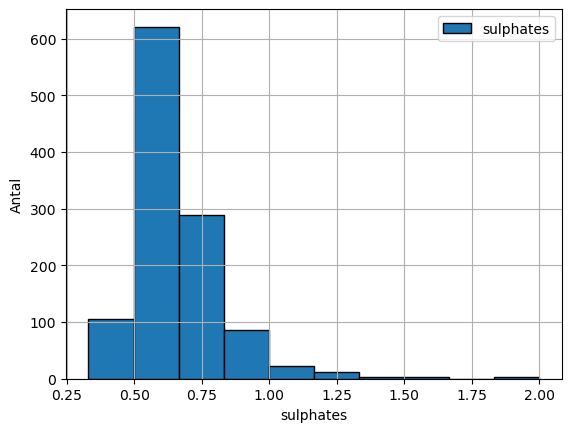

In [16]:
data['sulphates'].hist(legend = True, bins = 10, ec = 'black')
plt.xlabel('sulphates')
plt.ylabel('Antal')

### som att de flesta vinen har sulfatvärden mellan 0.4 och 0.8. Det finns också några få viner som har högre sulfatvärden runt 1.0.

Text(0, 0.5, 'Antal')

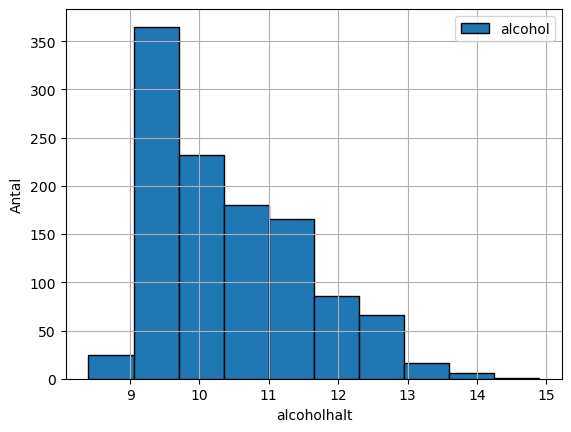

In [17]:
data['alcohol'].hist(legend = True, bins = 10, ec = 'black')
plt.xlabel('alcoholhalt')
plt.ylabel('Antal')

### Histogrammet visar att den vanligaste alkoholhalten i vinerna är runt 9-10 procent, men det finns också en del viner med högre alkoholhalt upp till 14 procent.

Text(0, 0.5, 'Antal')

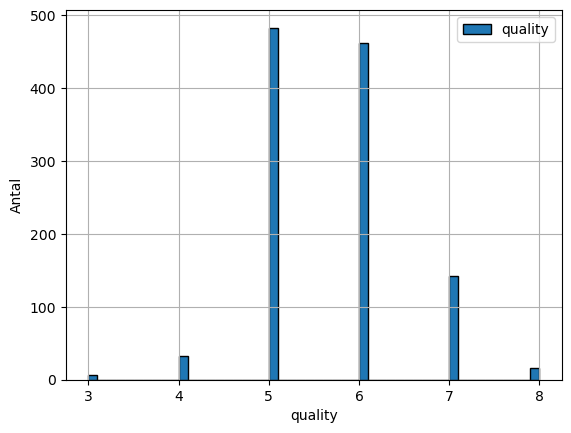

In [18]:
data['quality'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('quality')
plt.ylabel('Antal')

### Vi har ju 6 olika klasser av vin uttifrån kvaliteten, och i histogrammet ser man att dem flesta viner har en kvalite av 5 och 6.

## Attributen "Id" enbart innehåller en unik identifierare för varje datapunkt och ger inte någon information om attributet eller påverkar inte modellens prestanda, så den kan vanligtvis betraktas som irrelevant för analysen och kan tas bort. 

In [19]:
data.drop('Id', axis =1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [20]:
X = data.drop('quality', axis=1)# Separera input attribut och target 
y = data['quality']

### kolumnen "quality" är troligtvis för att det är den målvariabel som vi försöker förutsäga i denna maskininlärningsuppgift. Därför bör den separeras från indataattributen och lagras separat. Målet är att träna en modell med hjälp av indataattributen och de kända kvalitetsvärdena, och sedan använda den tränade modellen för att göra förutsägelser på nya, osedda data där kvalitetsvärdet inte är känt.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [22]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [23]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
test_score = tree_model.score(X_test, y_test)
print('modellen får test score', test_score.round(2) )

modellen får test score 0.61


In [25]:
depth = tree_model.get_depth()

In [26]:
print('Djupt:', depth)

Djupt: 3


In [27]:
n_leaves = tree_model.get_n_leaves()

In [28]:
print('Trädet har', n_leaves, 'löv')

Trädet har 8 löv


### för att se vilka attribut som har störst påverkan vill jag använda  "for loop" för att loopa igenom alla attribut och gemföra deras påverkan och välja den största med hjäp av en if sats. 

In [29]:
importances = tree_model.feature_importances_
attributes = X.columns
most_important_attribut = ''
most_important_importance = 0
for feature, importance in zip(attributes, importances):
    if importance > most_important_importance:
        most_important_attribut = feature
        most_important_importance = importance
        
print(f"Störst påverkan har {most_important_attribut} som är {most_important_importance.round(2)}")# jag avrunda resultatet med två decimal för bättre läsbarhet


Störst påverkan har alcohol som är 0.64


# VG delan 

In [30]:
train_score = tree_model.score(X_train, y_train)

In [31]:
print('train score:', train_score.round(2))
print('test score:', test_score.round(2))

train score: 0.59
test score: 0.61


### Min train score och test score är väldigt nära det vill säga att modellen är ganska bra på att generalisera och fungerar lika bra på både tränings- och testdata. Detta indikerar att modellen inte lider av överanpassning eller underanpassning. 
### Det går att justera hyperparametrar, t.ex. "max_depth" för att ändra trädets djupt och antal löven, och jag testade det men det enda skilnad jag fick var att träning scoret närmades sig till 1 och med test scoret hände inte så mycket. vilket tydde på att modellen blev värre och beslutsträdet överanpassade träningsdatan.
### Om det inte finns någon skillnad mellan train score och test score, kan modellen anses vara välkalibrerad och är möjligen det bästa resultatet som kan uppnås för den givna datan. eftersom min träning score är 0.59 och test score 0.61 så modellen är välkalibrerad.

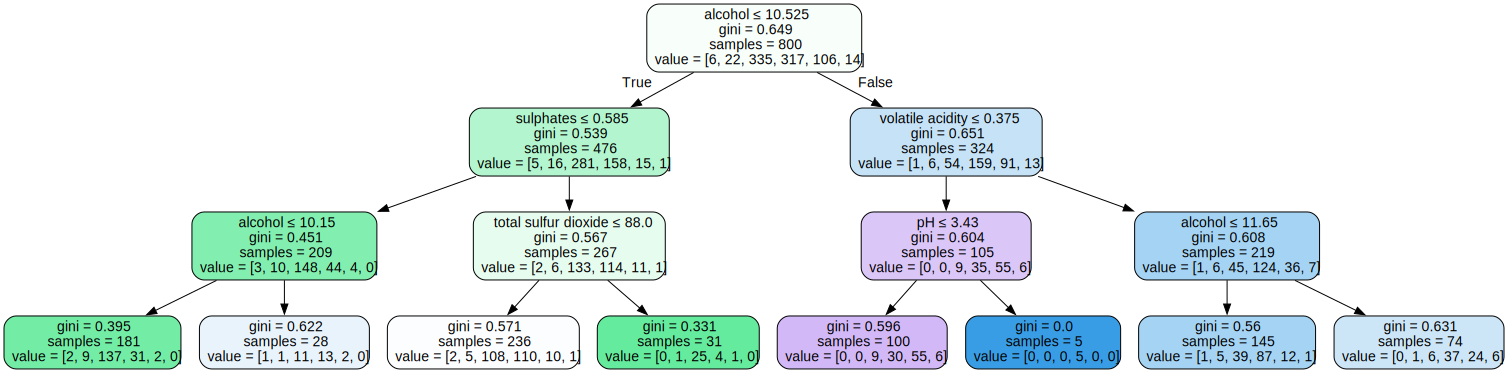

In [34]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                               feature_names = tree_model.feature_names_in_,
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

### fför att räkna ut maximala antal grenar från en nod, behöver man räkna antalet unika värden på attributet som används i den noden. Eftersom min första nod är baserad på attributet "alcohol", så  "alcohol" är det attribut som har byggt upp det första noden i beslutsträdet, innebär det att det var det attribut som hade högst informationsvärde och därmed var mest effektivt för att separera datapunkterna i olika kategorier i det beslutsträdet. för att räkna ut den maximala antal grenar behöver jag räkna antalet unika värden på "alcohol" för att bestämma det maximala antalet grenar som kan komma från noden.

In [42]:
num_unique = data['alcohol'].nunique()
print('maximala grenar från den nod:',num_unique)

maximala grenar från den nod: 61


### Så man ser att antalet unika värden för "alcohol" är 61, detta visar att den maximala antal grenar från den nod kan vara 61

In [35]:
num_nodes = tree_model.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)

Number of nodes in the decision tree: 15
